# General info and Data preparation

Name: Thomas Alfio Drury

id: 1000033473

Company: PulteGroup, Inc.

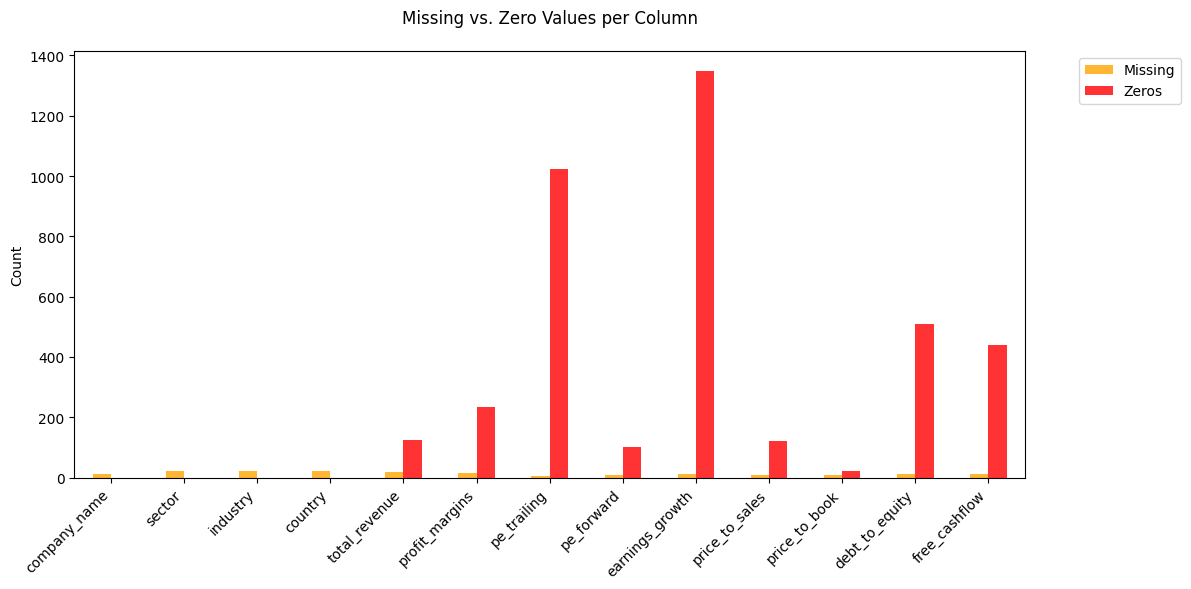

/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/1544324476.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Remove rows with any missing values


In [1]:
###################################################
# Libraries
##################################################

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###################################################
# Preparing the datset
##################################################

original_df = pd.read_csv("Symbols_info_modified.csv", sep=",")

# Select relevant columns
selected_columns = [
    'symbol', 'company_name','sector','industry','country','market_cap',
    'net_income', 'total_revenue', 'return_on_assets', 'return_on_equity',
    'profit_margins', 'pe_trailing', 'pe_forward', 'earnings_growth',
    'price_to_sales', 'price_to_book', 'revenue_growth',
    'debt_to_equity', 'dividend_yield', 'payout_ratio', 'free_cashflow'
]

df = original_df[selected_columns]

# Counting the  useless info
missing = df.isnull().sum()
zeros = (df == 0).sum()


counts = pd.DataFrame({"Missing": missing, "Zeros": zeros}).loc[missing > 0]

###################################################
# Graphic rappresentation of null values
##################################################

fig, ax = plt.subplots(figsize=(12, 6))
counts.plot(kind="bar", ax=ax, color=["#FFA500", "#FF0000"], alpha=0.8)
plt.title("Missing vs. Zero Values per Column", pad=20)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


###################################################
# Actually cleaning
##################################################


df.dropna(inplace=True)  # Remove rows with any missing values

df = df[(df != 0).all(axis=1)]  # Drops rows with any zero






In [2]:
###################################################
# Company. PulteGroup
##################################################

company_name = "PulteGroup, Inc."
company_data = df[df['company_name'] == company_name][selected_columns]

print(company_data.info()) #  cheking if my comapny is in the dataset


###################################################
# Creating the metrics of interest
##################################################

# Metric for Profitability 
df['Net Profit Margin'] = df['net_income'] / df['total_revenue']
df['ROA'] = df['return_on_assets']
df['ROE'] = df['return_on_equity']
df['Profit Margins'] = df['profit_margins']

# Metric for Valuation 
df['P/E Trailing'] = df['pe_trailing']
df['P/E Forward'] = df['pe_forward']
df['PEG Ratio'] = df['pe_forward'] / df['earnings_growth']
df['Price/Sales'] = df['price_to_sales']
df['Price/Book'] = df['price_to_book']

# Metric for Efficiency 
df['Revenue Growth'] = df['revenue_growth']
df['Earnings Growth'] = df['earnings_growth']

# Metric for Financial Strength 
df['Debt/Equity'] = df['debt_to_equity']
df['Dividend Yield'] = df['dividend_yield']
df['Payout Ratio'] = df['payout_ratio']
df['Free Cash Flow'] = df['free_cashflow']

# Metrics requested
metrics_of_interest = [
    'symbol', 'company_name','sector','industry','country','market_cap',
    'Net Profit Margin', 'ROA', 'ROE', 'Profit Margins',
    'P/E Trailing', 'P/E Forward', 'PEG Ratio', 'Price/Sales', 'Price/Book',
    'Revenue Growth', 'Earnings Growth',
    'Debt/Equity', 'Dividend Yield', 'Payout Ratio', 'Free Cash Flow'
]

# Final Dataframe
df_metrics = df[metrics_of_interest]

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2230 to 2230
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            1 non-null      object 
 1   company_name      1 non-null      object 
 2   sector            1 non-null      object 
 3   industry          1 non-null      object 
 4   country           1 non-null      object 
 5   market_cap        1 non-null      int64  
 6   net_income        1 non-null      uint64 
 7   total_revenue     1 non-null      float64
 8   return_on_assets  1 non-null      float64
 9   return_on_equity  1 non-null      float64
 10  profit_margins    1 non-null      float64
 11  pe_trailing       1 non-null      float64
 12  pe_forward        1 non-null      float64
 13  earnings_growth   1 non-null      float64
 14  price_to_sales    1 non-null      float64
 15  price_to_book     1 non-null      float64
 16  revenue_growth    1 non-null      float64
 17  

In [3]:

import plotly.express as px
import country_converter as coco # this library is used to convert country names to  codes and continents 
# it is an alterative approach to 'TypeofChart2' in which we re-named the country manually

# documentation: 'https://github.com/IndEcol/country_converter'



country_counts = df.groupby('country')['symbol'].nunique().reset_index(name='ncompany')

# Using the above library to convert the country names to ISO3 in order to the graph
cc = coco.CountryConverter()
country_counts['alpha-3'] = country_counts['country'].apply(
    lambda x: cc.convert(names=x, to='ISO3', not_found=None)
)
country_counts['region'] = country_counts['country'].apply(
    lambda x: cc.convert(names=x, to='continent', not_found=None)
)

# Remove country with no info
country_counts = country_counts[country_counts['alpha-3'].notna()]

#  Create a Choropleth Map for All Countries
fig = px.choropleth(
    country_counts,
    locations="alpha-3",
    color="ncompany",
    hover_name="country",
    custom_data=["region", "country"],
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'ncompany': 'Number of Companies'},
    title="Number of Companies by Country after Cleaning Dataset",
)

# Customize the coursor name  when click on a country
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1,
    hovertemplate=(
        "<b>%{hovertext}</b><br>"
        "Companies: %{z}<br>"
        "Region: %{customdata[0]}<br>"
        "Country: %{customdata[1]}<extra></extra>" 
    )
)

fig.update_geos(showcountries=True, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


## Creating Barcharts

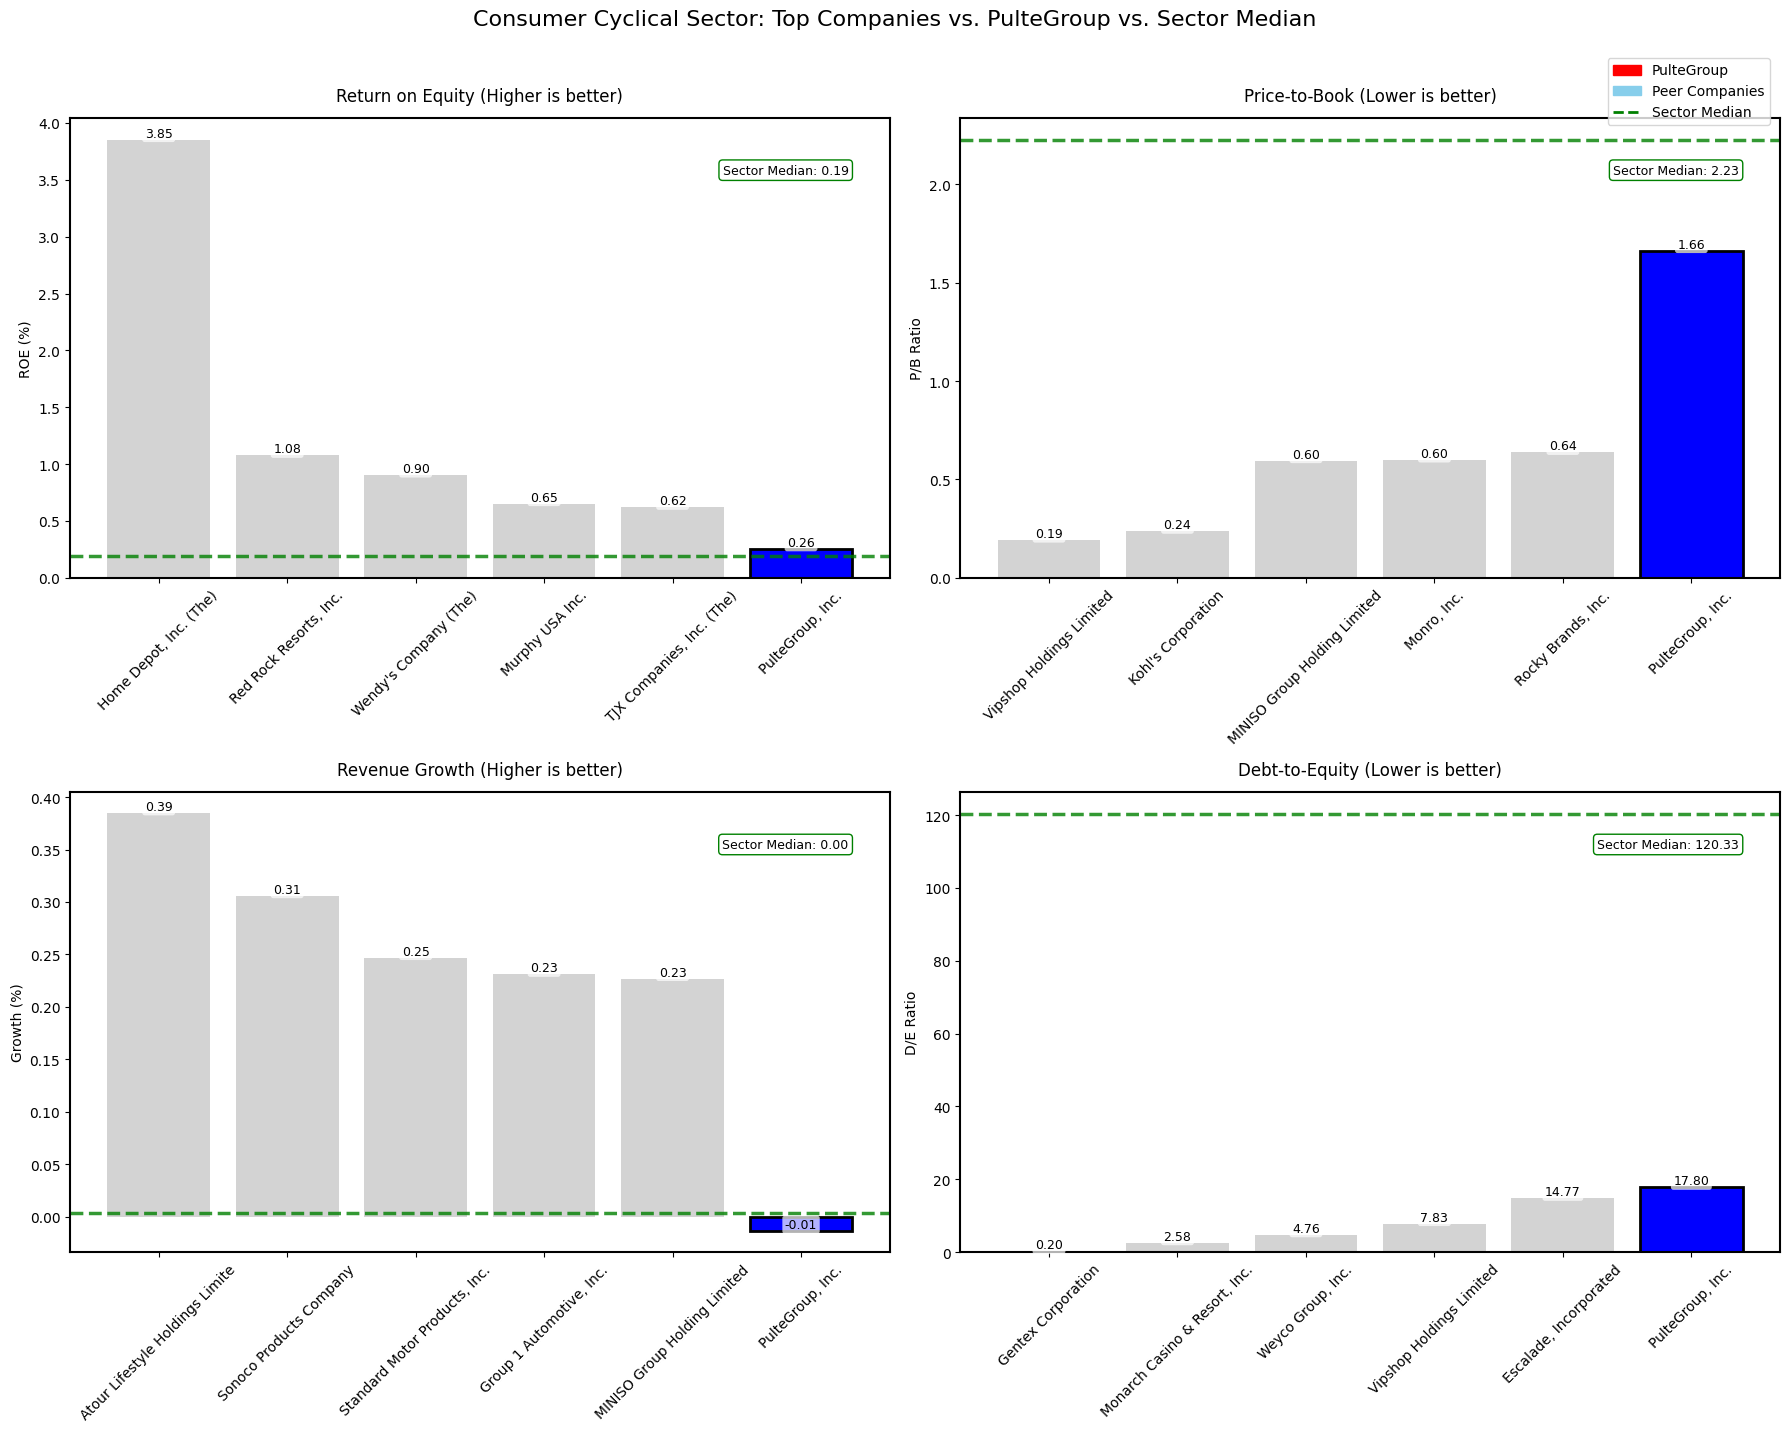


Consumer Cyclical Sector Median Values:
ROE                 0.192195
Price/Book          2.228358
Revenue Growth      0.003500
Debt/Equity       120.332500

PulteGroup's Key Metrics:
    ROE  Price/Book  Revenue Growth  Debt/Equity
0.25522    1.664058          -0.014       17.795


In [4]:
#  company name of interest (id:473)
my_company_P = "PulteGroup, Inc."  


# Metric that I choose for the analysis
metrics_for_analysis = ['ROE', 'Price/Book', 'Revenue Growth', 'Debt/Equity']

# Filter the sector of interest (of Pultre)
sector_companies = df_metrics[df_metrics['sector'] == 'Consumer Cyclical'].copy()

# Computing the median for the graph of Consumer Cyclical Sector
sector_medians = sector_companies[metrics_for_analysis].median()

# getting the top 5 companies and adding Pultre 
def add_P_if_need(sorted_df, metric, ascending=False, top_n=5):
    top_companies = sorted_df.sort_values(by=metric, ascending=ascending).head(top_n)
    my_company_P_row = sector_companies[sector_companies['company_name'] == my_company_P]
    if not my_company_P_row.empty and my_company_P not in top_companies['company_name'].values:
        top_companies = pd.concat([top_companies, my_company_P_row])
    return top_companies.sort_values(by=metric, ascending=ascending)

# Preparing data for each metric and ordering in ascending or descending order
Roe_sector = add_P_if_need(sector_companies, 'ROE', ascending=False)
Price_sector = add_P_if_need(sector_companies, 'Price/Book', ascending=True)
Revenue_sector = add_P_if_need(sector_companies, 'Revenue Growth', ascending=False)
Debt_sector = add_P_if_need(sector_companies, 'Debt/Equity', ascending=True)

###################################################
# Graph
##################################################
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Consumer Cyclical Sector: Top Companies vs. PulteGroup vs. Sector Median', 
             fontsize=16, y=1.02)




def create_metric_plot(ax, data, metric, title, ylabel, ascending_rank=False):
    data = data.sort_values(by=metric, ascending=ascending_rank)
    
    # Colors
    colors = ['blue' if x == my_company_P else 'lightgrey' for x in data['company_name']] # Pultre vs others
    edgecolors = ['black' if x == my_company_P else 'none' for x in data['company_name']]
    linewidths = [2 if x == my_company_P else 0.5 for x in data['company_name']]
    
    bars = ax.bar(data['company_name'], data[metric], 
                 color=colors, edgecolor=edgecolors, linewidth=linewidths)
    
    # Add median line 
    median_value = sector_medians[metric]
    ax.axhline(y=median_value, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    
    # Add median text in top right with box
    ax.text(0.95, 0.90, f'Sector Median: {median_value:.2f}', 
            va='top', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
            fontsize=9)
    
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)
    
    ax.set_title(title, pad=12)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    
    
    
    for bar in bars:
        actual_value = bar.get_height()
        display_height = actual_value   # Adjustment for visual graph (used in the other graph under)
    
        ax.text(bar.get_x() + bar.get_width()/2., display_height,
            f'{actual_value:.2f}',  # This displays the actual value
            ha='center', va='bottom', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')) 

create_metric_plot(axes[0, 0], Roe_sector, 'ROE', 
                  'Return on Equity (Higher is better)', 'ROE (%)')
create_metric_plot(axes[0, 1], Price_sector, 'Price/Book', 
                  'Price-to-Book (Lower is better)', 'P/B Ratio', ascending_rank=True)
create_metric_plot(axes[1, 0], Revenue_sector, 'Revenue Growth', 
                  'Revenue Growth (Higher is better)', 'Growth (%)')
create_metric_plot(axes[1, 1], Debt_sector, 'Debt/Equity', 
                  'Debt-to-Equity (Lower is better)', 'D/E Ratio', ascending_rank=True)

#  
legend_elements = [
    plt.Rectangle((0,0),1,1, color='red', label='PulteGroup'),
    plt.Rectangle((0,0),1,1, color='skyblue', label='Peer Companies'),
    plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Sector Median')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout()
plt.show()

###################################################
# Getting the values
##################################################
print("\nConsumer Cyclical Sector Median Values:")
print(sector_medians[metrics_for_analysis].to_string())

print("\nPulteGroup's Key Metrics:")
pulte_metrics = sector_companies[sector_companies['company_name'] == my_company_P][metrics_for_analysis] 
print(pulte_metrics.to_string(index=False))


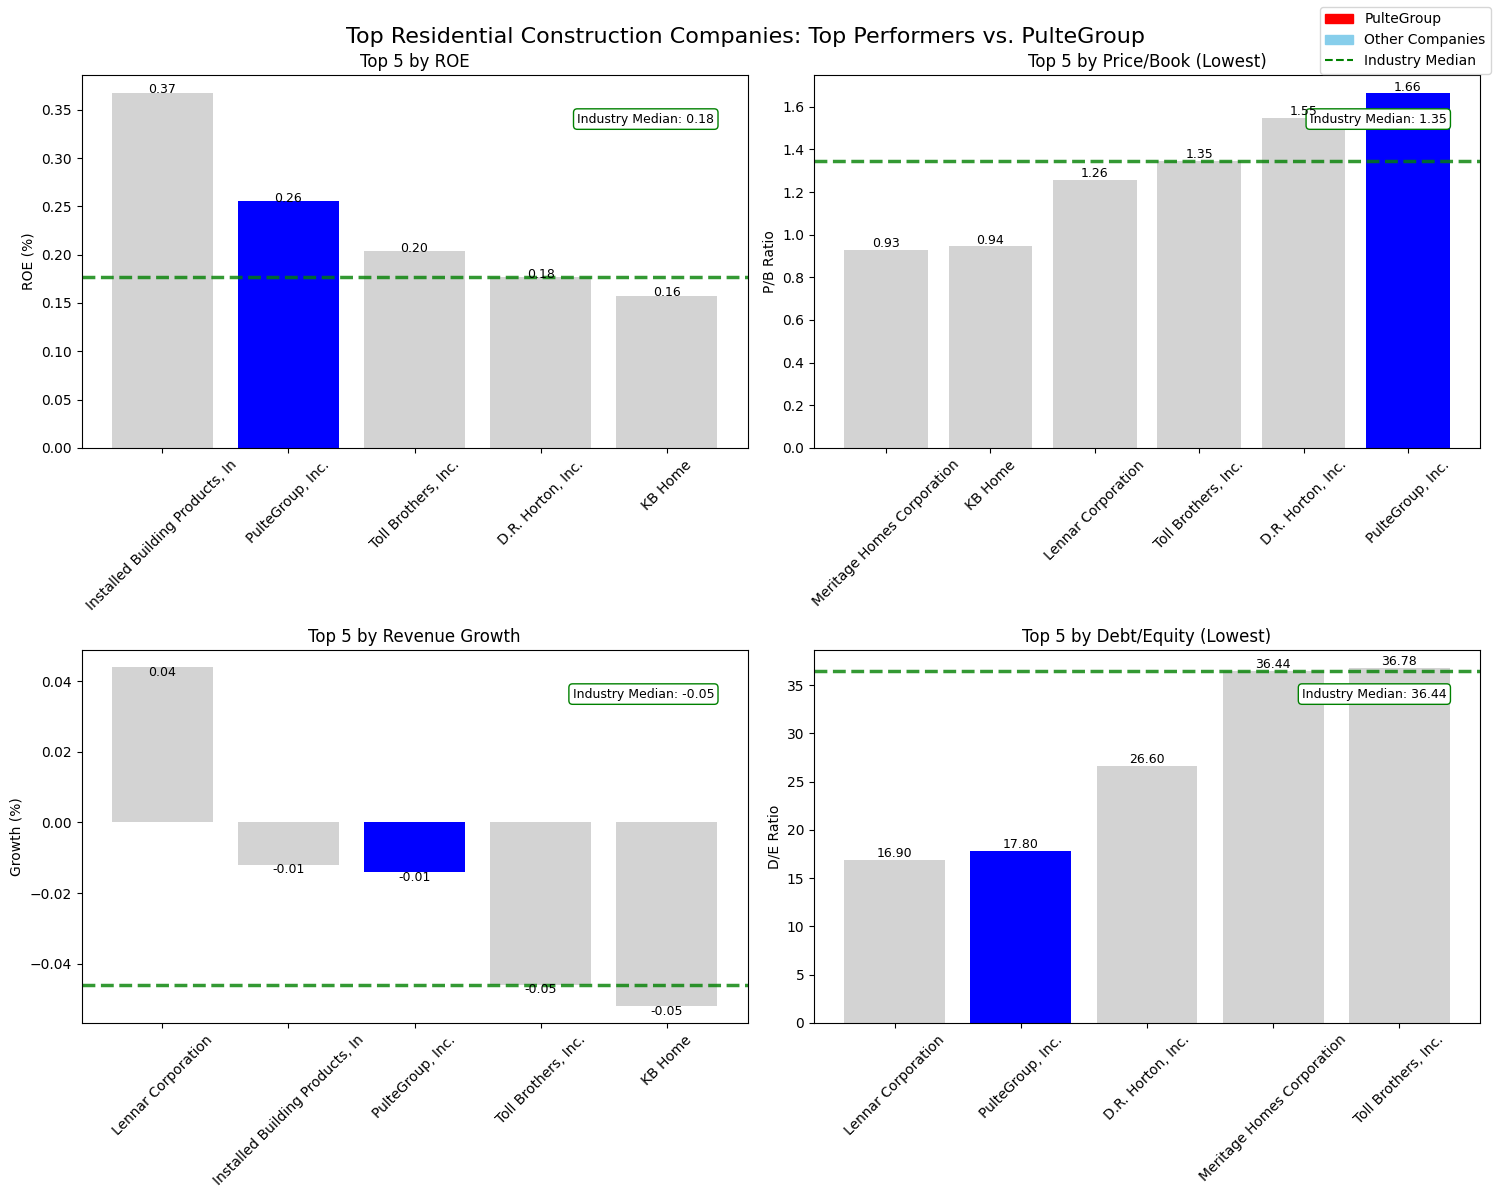


PulteGroup's Key Metrics in Residential Construction:
    ROE  Price/Book  Revenue Growth  Debt/Equity
0.25522    1.664058          -0.014       17.795

Residential Construction Industry Medians:
ROE                0.176490
Price/Book         1.347379
Revenue Growth    -0.046000
Debt/Equity       36.438000


In [5]:
metrics_for_analysis = ['ROE','Price/Book','Revenue Growth','Debt/Equity']
industry_companies = df_metrics[df_metrics['industry'] == 'Residential Construction']



# Handeling the problem that some graph will display only 4 companies (this happended because Lennar Corporation
# is in the dataset twice.Lennar has actually two stocks with very similar values, so I decided to drop one value)

industry_companies = industry_companies.drop_duplicates(subset=['company_name'], keep='first')

industry_medians = industry_companies[metrics_for_analysis].median()


my_company_P = "PulteGroup, Inc."  

def add_P_if_need(sorted_df, metric, ascending=False, top_n=5):
    top_companies = sorted_df.sort_values(by=metric, ascending=ascending).head(top_n)
    my_company_P_row = industry_companies[industry_companies['company_name'] == my_company_P]
    if not my_company_P_row.empty and my_company_P not in top_companies['company_name'].values:
        top_companies = pd.concat([top_companies, my_company_P_row])
    return top_companies.sort_values(by=metric, ascending=ascending)

Roe_industry = add_P_if_need(industry_companies, metrics_for_analysis[0], ascending=False)
Price_industry = add_P_if_need(industry_companies, metrics_for_analysis[1], ascending=True)
Revenue_industry = add_P_if_need(industry_companies, metrics_for_analysis[2], ascending=False)
Debt_industry = add_P_if_need(industry_companies, metrics_for_analysis[3], ascending=True)



fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Top Residential Construction Companies: Top Performers vs. PulteGroup', fontsize=16)


def create_metric_plot(ax, data, metric, title, ylabel, ascending_rank=False):

    data = data.sort_values(by=metric, ascending=ascending_rank)
    

    colors = ['blue' if x == my_company_P else 'lightgrey' for x in data['company_name']]
    
    bars = ax.bar(data['company_name'], data[metric], color=colors)
    

    
    median_value = industry_medians[metric]  
    ax.axhline(y=median_value, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    
    
    ax.text(0.95, 0.90, f'Industry Median: {median_value:.2f}', 
            va='top', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
            fontsize=9)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    

    for bar in bars:
        actual_value = bar.get_height()
        display_height = actual_value - 0.0033  
        
        ax.text(bar.get_x() + bar.get_width()/2., display_height,
                f'{actual_value:.2f}',  
                ha='center', va='bottom', fontsize=9)


create_metric_plot(axes[0, 0], Roe_industry, metrics_for_analysis[0], 
                  f'Top 5 by {metrics_for_analysis[0]}', 'ROE (%)')
create_metric_plot(axes[0, 1], Price_industry, metrics_for_analysis[1], 
                  f'Top 5 by {metrics_for_analysis[1]} (Lowest)', 'P/B Ratio', ascending_rank=True)
create_metric_plot(axes[1, 0], Revenue_industry, metrics_for_analysis[2], 
                  f'Top 5 by {metrics_for_analysis[2]}', 'Growth (%)')
create_metric_plot(axes[1, 1], Debt_industry, metrics_for_analysis[3], 
                  f'Top 5 by {metrics_for_analysis[3]} (Lowest)', 'D/E Ratio', ascending_rank=True)


legend_elements = [
    plt.Rectangle((0,0),1,1, color='red', label='PulteGroup'),
    plt.Rectangle((0,0),1,1, color='skyblue', label='Other Companies'),
    plt.Line2D([0], [0], color='green', linestyle='--', label='Industry Median')
]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


pulte_metrics = industry_companies[industry_companies['company_name'] == my_company_P][metrics_for_analysis]
print("\nPulteGroup's Key Metrics in Residential Construction:")
print(pulte_metrics.to_string(index=False))


print("\nResidential Construction Industry Medians:")
print(industry_medians.to_string())


In [6]:
print(industry_companies['company_name'].value_counts())

company_name
D.R. Horton, Inc.                  1
Installed Building Products, In    1
KB Home                            1
Lennar Corporation                 1
Meritage Homes Corporation         1
PulteGroup, Inc.                   1
Toll Brothers, Inc.                1
Name: count, dtype: int64


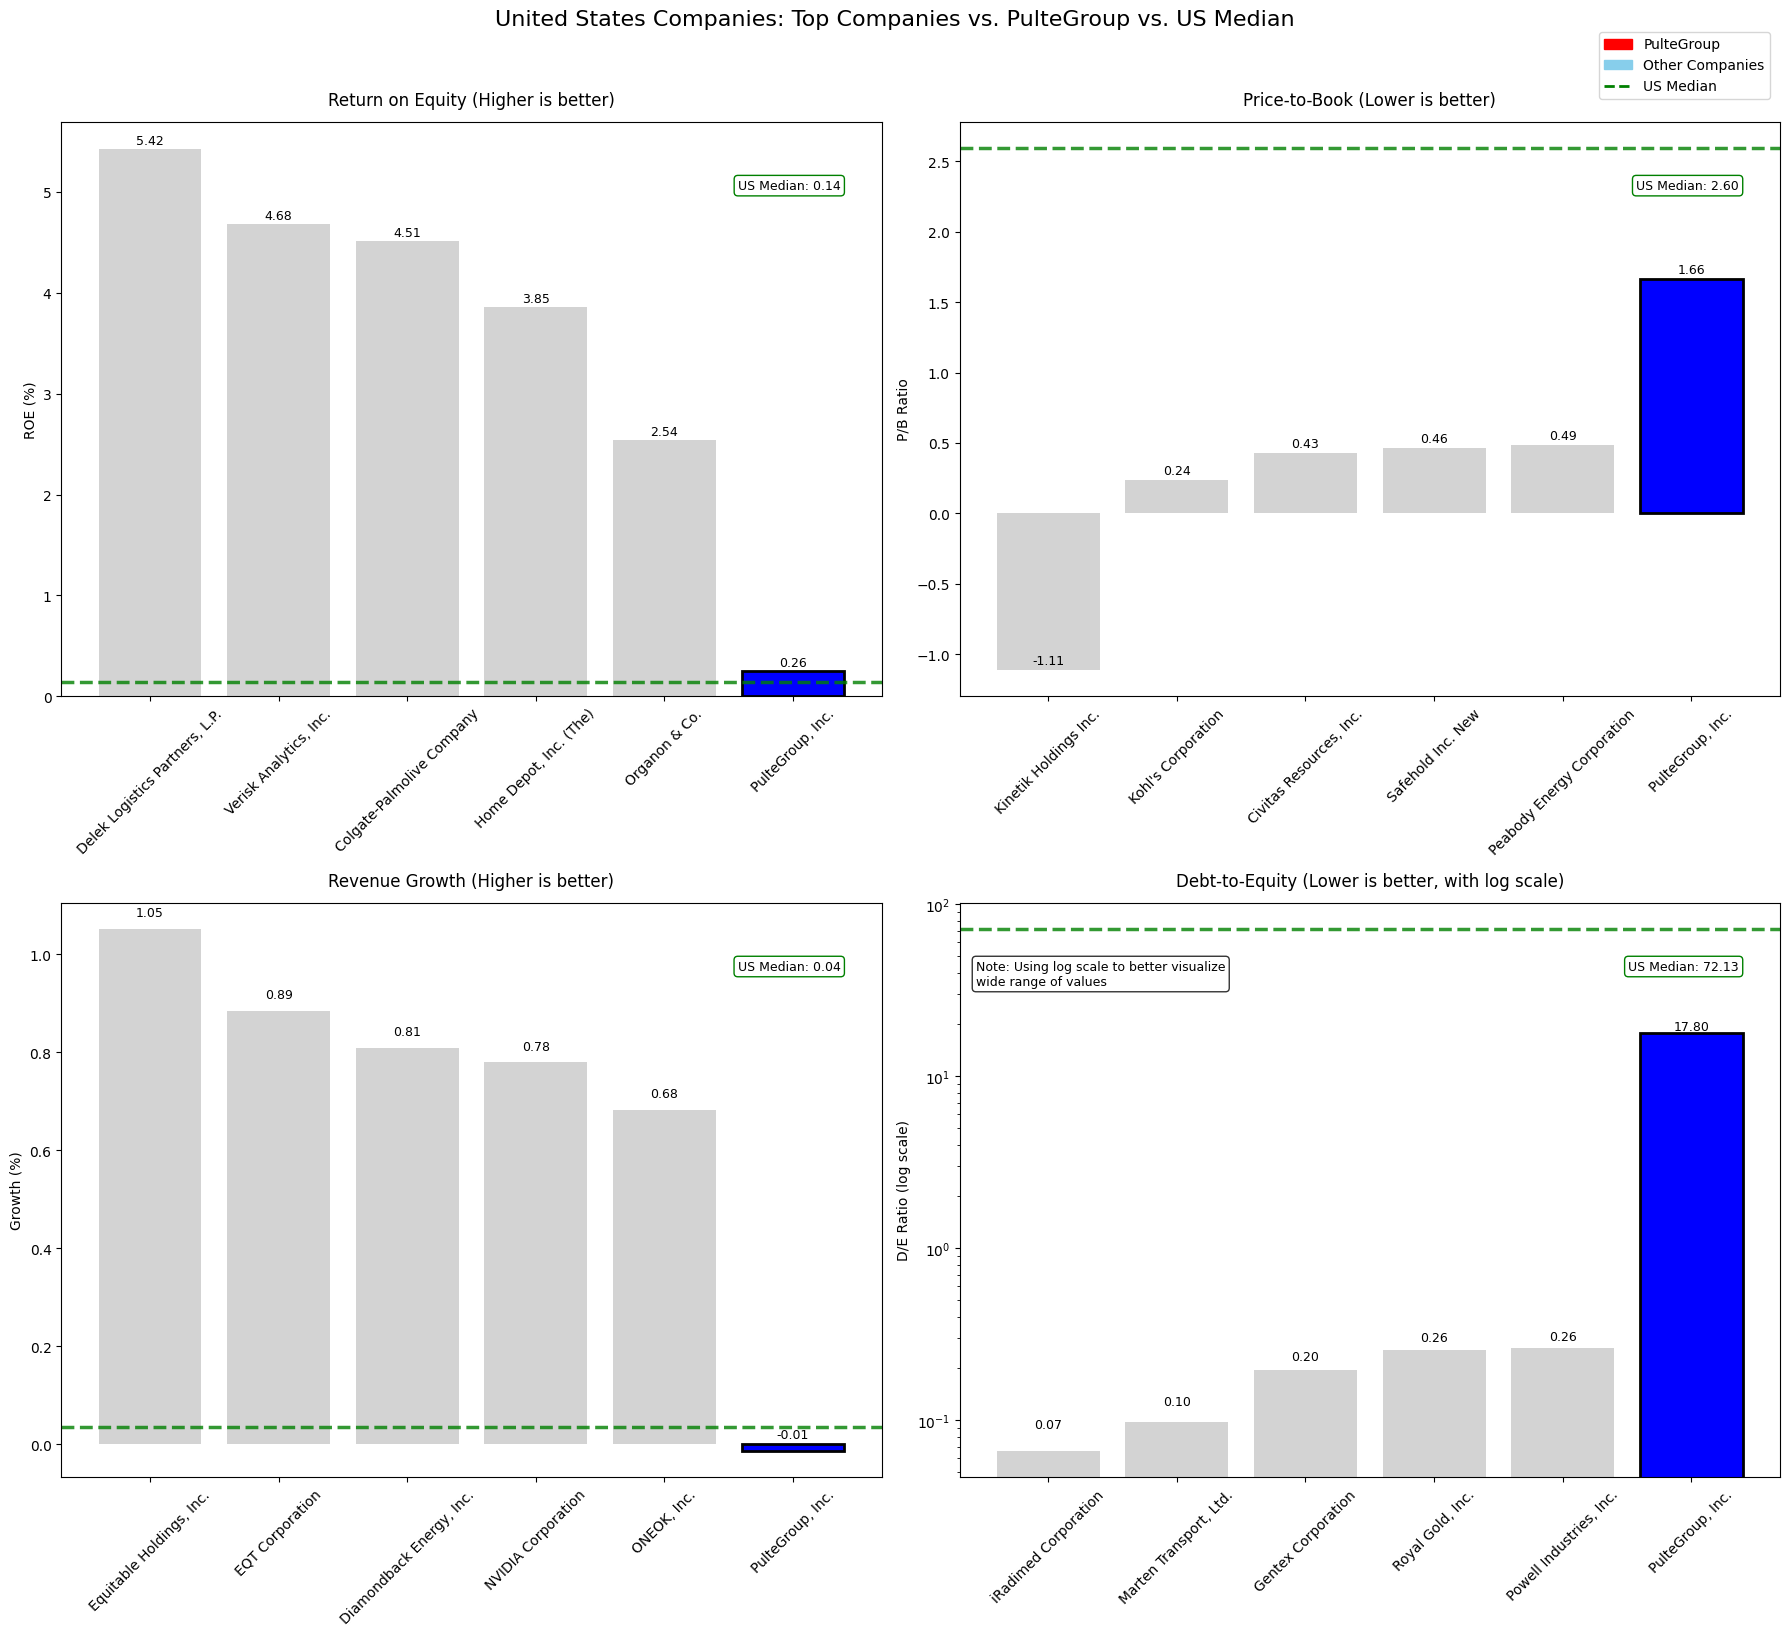


PulteGroup's Key Metrics:
    ROE  Price/Book  Revenue Growth  Debt/Equity
0.25522    1.664058          -0.014       17.795

United States Companies Median Values:
ROE                0.14175
Price/Book         2.59528
Revenue Growth     0.03600
Debt/Equity       72.13000


In [7]:
# United States (where is based Pultre Group)
us_companies = df_metrics[df_metrics['country'] == 'United States']
us_medians = us_companies[metrics_for_analysis].median()



def add_P_if_need(sorted_df, metric, ascending=False, top_n=5):
    top_companies = sorted_df.sort_values(by=metric, ascending=ascending).head(top_n)
    my_company_P_row = us_companies[us_companies['company_name'] == my_company_P]
    if not my_company_P_row.empty and my_company_P not in top_companies['company_name'].values:
        top_companies = pd.concat([top_companies, my_company_P_row])
    return top_companies.sort_values(by=metric, ascending=ascending)

Roe_us = add_P_if_need(us_companies, 'ROE', ascending=False)
Price_us = add_P_if_need(us_companies, 'Price/Book', ascending=True)
Revenue_us = add_P_if_need(us_companies, 'Revenue Growth', ascending=False)
Debt_us = add_P_if_need(us_companies, 'Debt/Equity', ascending=True)


fig, axes = plt.subplots(2, 2, figsize=(18, 16))
fig.suptitle('United States Companies: Top Companies vs. PulteGroup vs. US Median', 
             fontsize=16, y=1.02)

def create_metric_plot(ax, data, metric, title, ylabel, ascending_rank=False, log_scale=False): # last arg added just for US charts
    data = data.sort_values(by=metric, ascending=ascending_rank)
    
    colors = ['blue' if x == my_company_P else 'lightgrey' for x in data['company_name']]
    edgecolors = ['black' if x == my_company_P else 'none' for x in data['company_name']]
    linewidths = [2 if x == my_company_P else 0.5 for x in data['company_name']]
    
    bars = ax.bar(data['company_name'], data[metric], 
                 color=colors, edgecolor=edgecolors, linewidth=linewidths)
    
    
    median_value = us_medians[metric]
    ax.axhline(y=median_value, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    
    
    ax.text(0.95, 0.90, f'US Median: {median_value:.2f}', 
            va='top', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
            fontsize=9)
    
    # Set logarithmic scale needed to handle problem related to graphic representation (Debt/Equity graph)
    if log_scale:
        ax.set_yscale('log')
        ylabel += " (log scale)"
    
    ax.set_title(title, pad=12)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    
    
    for bar in bars:
        actual_value = bar.get_height()
        display_height = actual_value + 0.02  
        
        ax.text(bar.get_x() + bar.get_width()/2., display_height,
                f'{actual_value:.2f}',  
                ha='center', va='bottom', fontsize=9)


create_metric_plot(axes[0, 0], Roe_us, 'ROE', 
                  'Return on Equity (Higher is better)', 'ROE (%)')
create_metric_plot(axes[0, 1], Price_us, 'Price/Book', 
                  'Price-to-Book (Lower is better)', 'P/B Ratio', ascending_rank=True)
create_metric_plot(axes[1, 0], Revenue_us, 'Revenue Growth', 
                  'Revenue Growth (Higher is better)', 'Growth (%)')


use_log_scale = (Debt_us['Debt/Equity'].max() / Debt_us['Debt/Equity'].min()) > 10
create_metric_plot(axes[1, 1], Debt_us, 'Debt/Equity', 
                  'Debt-to-Equity (Lower is better, with log scale)', 'D/E Ratio', 
                  ascending_rank=True, log_scale=use_log_scale)


legend_elements = [
    plt.Rectangle((0,0),1,1, color='red', label='PulteGroup'),
    plt.Rectangle((0,0),1,1, color='skyblue', label='Other Companies'),
    plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='US Median')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 1.01))



axes[1,1].annotate('Note: Using log scale to better visualize\nwide range of values', 
                   xy=(0.02, 0.90), xycoords='axes fraction',
                   fontsize=9, ha='left', va='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()




print("\nPulteGroup's Key Metrics:")
pulte_metrics = us_companies[us_companies['company_name'] == my_company_P][metrics_for_analysis]
print(pulte_metrics.to_string(index=False))



print("\nUnited States Companies Median Values:")
print(us_medians.to_string())



In [8]:
# getting the values with market cap similar to Pultre Group

pulte_market_cap = df_metrics[df_metrics['company_name'] == "PulteGroup, Inc."]['market_cap'].values[0]


df_metrics['market_cap_diff'] = abs(df_metrics['market_cap'] - pulte_market_cap)

# Not including Pultre group 
closest_companies = df_metrics[df_metrics['company_name'] != "PulteGroup, Inc."].sort_values('market_cap_diff').head(5)



print('The companies with market cap closer to Pultre company are:\n')
print(closest_companies['symbol'])



The companies with market cap closer to Pultre company are:

67       AER
1490    INVH
2023    NTAP
649      CMS
1403    HUBB
Name: symbol, dtype: object


/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/904654087.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/2347378048.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/2347378048.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/2347378048.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/ly/bs3tr6xj7_l2c36k8x0nslhc0000gn/T/ipykernel_1710/2347378048.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



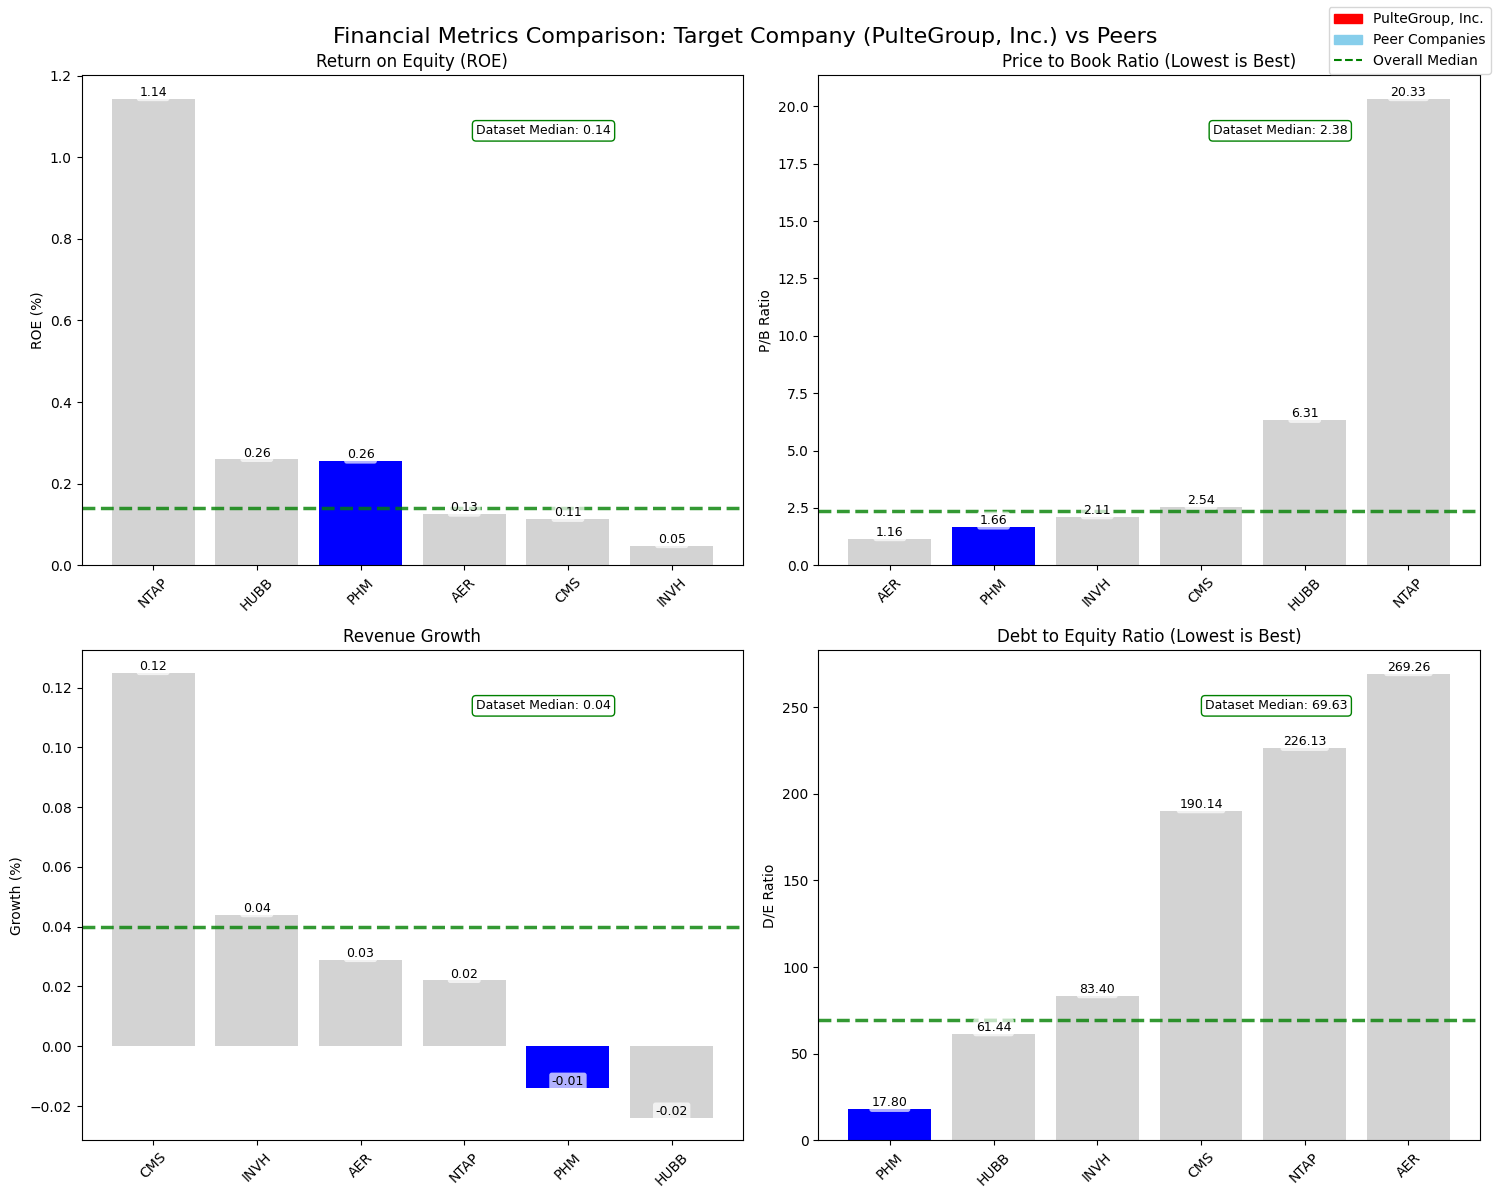


Key Metrics Comparison:
symbol           company_name     ROE  Price/Book  Revenue Growth  Debt/Equity
   AER   AerCap Holdings N.V. 0.12518    1.157658           0.029      269.263
   CMS CMS Energy Corporation 0.11234    2.536691           0.125      190.138
  HUBB            Hubbell Inc 0.25917    6.311655          -0.024       61.442
  INVH  Invitation Homes Inc. 0.04807    2.110740           0.044       83.399
  NTAP           NetApp, Inc. 1.14329   20.332586           0.022      226.131
   PHM       PulteGroup, Inc. 0.25522    1.664058          -0.014       17.795

Overall Dataset Medians:
ROE: 0.14
Price/Book: 2.38
Revenue Growth: 0.04
Debt/Equity: 69.63


In [9]:
# Using the above symbol in order to create this new dataset with market cap close to Pultre
target_companies = ['AER', 'INVH', 'NTAP', 'CMS', 'HUBB', 'PHM']
filtered_df_cl_P = df_metrics[df_metrics['symbol'].isin(target_companies)].copy() # dataset with only the companies similar to Pultre Group

metrics_for_analysis = ['ROE', 'Price/Book', 'Revenue Growth', 'Debt/Equity']
target_company = "PHM"
target_company_name = filtered_df_cl_P[filtered_df_cl_P['symbol'] == target_company]['company_name'].values[0]

# Median in General (of the whole dataset)
overall_median = {
    'ROE': df_metrics['ROE'].median(),
    'Price/Book': df_metrics['Price/Book'].median(),
    'Revenue Growth': df_metrics['Revenue Growth'].median(),
    'Debt/Equity': df_metrics['Debt/Equity'].median()
}




def get_sorted_companies(df, metric, ascending=False):
    return df.sort_values(by=metric, ascending=ascending)

Roe_companies = get_sorted_companies(filtered_df_cl_P, metrics_for_analysis[0], ascending=False)
Price_companies = get_sorted_companies(filtered_df_cl_P, metrics_for_analysis[1], ascending=True)
Revenue_companies = get_sorted_companies(filtered_df_cl_P, metrics_for_analysis[2], ascending=False)
Debt_companies = get_sorted_companies(filtered_df_cl_P, metrics_for_analysis[3], ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Financial Metrics Comparison: Target Company ({target_company_name}) vs Peers', fontsize=16)

def create_metric_plot(ax, data, metric, title, ylabel, ascending_rank=False):
    data = data.sort_values(by=metric, ascending=ascending_rank)
    colors = ['blue' if x == target_company else 'lightgrey' for x in data['symbol']]
    bars = ax.bar(data['symbol'], data[metric], color=colors)
    
    median_value = overall_median[metric]
    ax.axhline(y=median_value, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    
    ax.text(0.80, 0.90, f'Dataset Median: {median_value:.2f}',
            va='top', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
            fontsize=9)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    
    for bar in bars:
        actual_value = bar.get_height()
        display_height = actual_value   
    
        ax.text(bar.get_x() + bar.get_width()/2., display_height,
            f'{actual_value:.2f}',  
            ha='center', va='bottom', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
    
    for i, tick in enumerate(ax.get_xticklabels()):
        symbol = tick.get_text()
        company_name = data[data['symbol'] == symbol]['company_name'].values[0]
        tick.set_text(f"{symbol}\n({company_name})")
    ax.set_xticklabels(ax.get_xticklabels())

create_metric_plot(axes[0, 0], Roe_companies, metrics_for_analysis[0],
                  f'Return on Equity (ROE)', 'ROE (%)')
create_metric_plot(axes[0, 1], Price_companies, metrics_for_analysis[1],
                  f'Price to Book Ratio (Lowest is Best)', 'P/B Ratio', ascending_rank=True)
create_metric_plot(axes[1, 0], Revenue_companies, metrics_for_analysis[2],
                  f'Revenue Growth', 'Growth (%)')
create_metric_plot(axes[1, 1], Debt_companies, metrics_for_analysis[3],
                  f'Debt to Equity Ratio (Lowest is Best)', 'D/E Ratio', ascending_rank=True)

legend_elements = [
    plt.Rectangle((0,0),1,1, color='red', label=target_company_name),
    plt.Rectangle((0,0),1,1, color='skyblue', label='Peer Companies'),
    plt.Line2D([0], [0], color='green', linestyle='--', label='Overall Median')
]
fig.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

print("\nKey Metrics Comparison:")
display_cols = ['symbol', 'company_name', ] + metrics_for_analysis
print(filtered_df_cl_P[display_cols].sort_values('symbol').to_string(index=False))


print("\nOverall Dataset Medians:")
for metric, value in overall_median.items():
    print(f"{metric}: {value:.2f}")

## Recap and Consideration

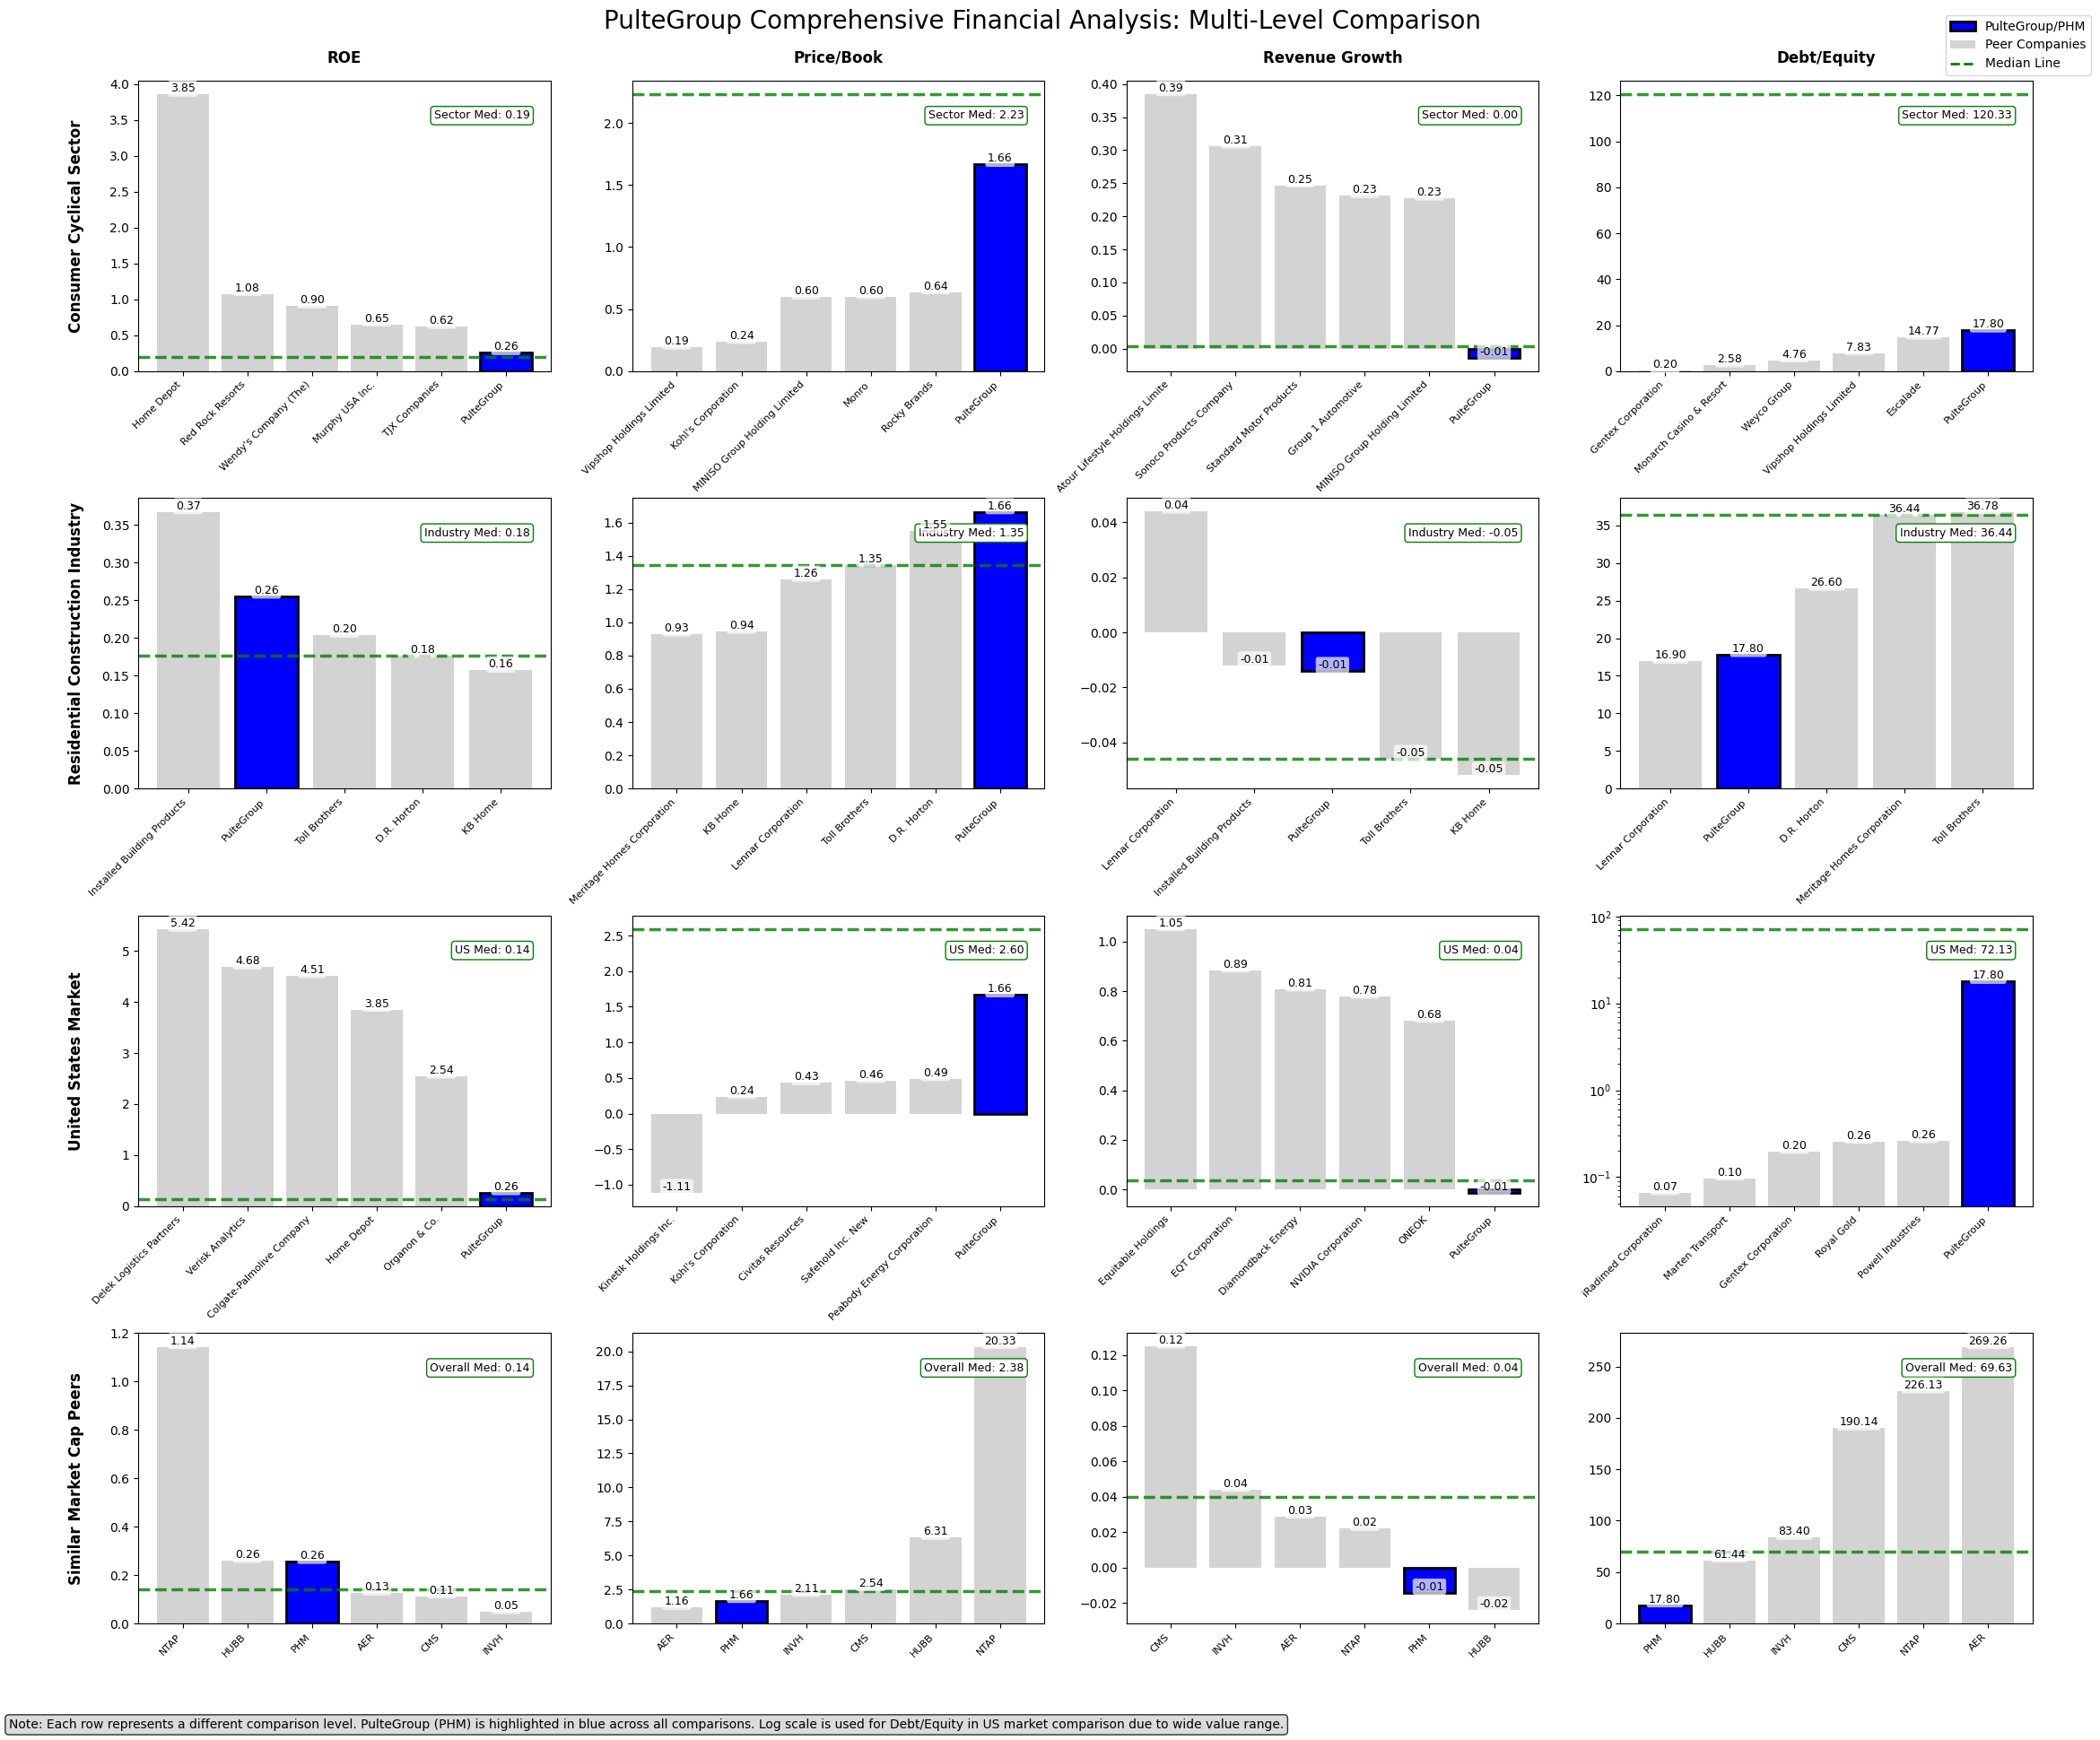

In [10]:
# Using the above information I create a summary of all the info



fig, axes = plt.subplots(4, 4, figsize=(24, 20))
fig.suptitle('PulteGroup Comprehensive Financial Analysis: Multi-Level Comparison', 
             fontsize=20, y=0.98)

# Row and Col
row_labels = ['Consumer Cyclical Sector', 'Residential Construction Industry', 
              'United States Market', 'Similar Market Cap Peers']
metric_labels = ['ROE (%)', 'Price/Book', 'Revenue Growth (%)', 'Debt/Equity']


def create_metric_plot(ax, data, metric, median_value, median_label, ascending_rank=False, 
                      log_scale=False, is_peer_comparison=False):
    data = data.sort_values(by=metric, ascending=ascending_rank)
    
    
    if is_peer_comparison:
        colors = ['blue' if x == 'PHM' else 'lightgrey' for x in data['symbol']]
        labels = data['symbol']
    else:
        colors = ['blue' if x == my_company_P else 'lightgrey' for x in data['company_name']]
        labels = [name.split(',')[0] if ',' in name else name for name in data['company_name']]
    
    edgecolors = ['black' if c == 'blue' else 'none' for c in colors]
    linewidths = [2 if c == 'blue' else 0.5 for c in colors]
    
    bars = ax.bar(range(len(data)), data[metric], 
                 color=colors, edgecolor=edgecolors, linewidth=linewidths)
    
    
    ax.axhline(y=median_value, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    
    
    ax.text(0.95, 0.90, f'{median_label}: {median_value:.2f}', 
            va='top', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
            fontsize=9)
    
    if log_scale:
        ax.set_yscale('log')
    
    
    for bar in bars:
        actual_value = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., actual_value,
                f'{actual_value:.2f}',
                ha='center', va='bottom', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', 
                         boxstyle='round,pad=0.2'))
    
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)

# Use the existing info
data_sets = [
    # Row 0: Consumer Cyclical Sector 
    [(Roe_sector, 'ROE', sector_medians['ROE'], 'Sector Med', False, False, False),
     (Price_sector, 'Price/Book', sector_medians['Price/Book'], 'Sector Med', True, False, False),
     (Revenue_sector, 'Revenue Growth', sector_medians['Revenue Growth'], 'Sector Med', False, False, False),
     (Debt_sector, 'Debt/Equity', sector_medians['Debt/Equity'], 'Sector Med', True, False, False)],
    
    # Row 1: Residential Construction Industry
    [(Roe_industry, 'ROE', industry_medians['ROE'], 'Industry Med', False, False, False),
     (Price_industry, 'Price/Book', industry_medians['Price/Book'], 'Industry Med', True, False, False),
     (Revenue_industry, 'Revenue Growth', industry_medians['Revenue Growth'], 'Industry Med', False, False, False),
     (Debt_industry, 'Debt/Equity', industry_medians['Debt/Equity'], 'Industry Med', True, False, False)],
    
    # Row 2: United States Market
    [(Roe_us, 'ROE', us_medians['ROE'], 'US Med', False, False, False),
     (Price_us, 'Price/Book', us_medians['Price/Book'], 'US Med', True, False, False),
     (Revenue_us, 'Revenue Growth', us_medians['Revenue Growth'], 'US Med', False, False, False),
     (Debt_us, 'Debt/Equity', us_medians['Debt/Equity'], 'US Med', True, True, False)],
    
    # Row 3: Similar Market Cap Peers 
    [(filtered_df_cl_P.sort_values('ROE', ascending=False), 'ROE', overall_median['ROE'], 'Overall Med', False, False, True),
     (filtered_df_cl_P.sort_values('Price/Book', ascending=True), 'Price/Book', overall_median['Price/Book'], 'Overall Med', True, False, True),
     (filtered_df_cl_P.sort_values('Revenue Growth', ascending=False), 'Revenue Growth', overall_median['Revenue Growth'], 'Overall Med', False, False, True),
     (filtered_df_cl_P.sort_values('Debt/Equity', ascending=True), 'Debt/Equity', overall_median['Debt/Equity'], 'Overall Med', True, False, True)]
]


for row_idx, row_data in enumerate(data_sets):
    for col_idx, (data, metric, median_val, median_label, ascending, log_scale, is_peer) in enumerate(row_data):
        ax = axes[row_idx, col_idx]
        create_metric_plot(ax, data, metric, median_val, median_label, 
                          ascending, log_scale, is_peer)
        
        
        if col_idx == 0:
            ax.text(-0.15, 0.5, row_labels[row_idx], 
                   transform=ax.transAxes, rotation=90, 
                   va='center', ha='center', fontsize=12, fontweight='bold')
        
       
        if row_idx == 0:
            ax.text(0.5, 1.05, f'{metrics_for_analysis[col_idx]}', 
                   transform=ax.transAxes, ha='center', va='bottom', 
                   fontsize=12, fontweight='bold')


legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='blue', edgecolor='black', linewidth=2, 
                 label='PulteGroup/PHM'),
    plt.Rectangle((0,0),1,1, facecolor='lightgrey', label='Peer Companies'),
    plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Median Line')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.98))


fig.text(0.02, 0.02, 
         'Note: Each row represents a different comparison level. '
         'PulteGroup (PHM) is highlighted in blue across all comparisons. '
         'Log scale is used for Debt/Equity in US market comparison due to wide value range.',
         fontsize=10, ha='left', va='bottom',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.94, bottom=0.08, left=0.08, right=0.96)
plt.show()



**PulteGroup Performance Analysis**

**Brief Summary**
This analysis evaluates PulteGroup's financial performance across multiple comparison frameworks: sector-wide, industry-specific, national, and peer group comparisons across four key financial metrics.

**Sector Comparison: Consumer Cyclical**
When compared to the top 5 companies in the consumer cyclical sector, PulteGroup ranks last in most metrics:
As regards the Return on Equity (ROE) it performs at the sector median level instead the Price-to-Book Ratio is better than the sector median. In Revenue Growth it actually falls below the sector median while the Debt-to-Equity Ratio outperforms the sector median

**Industry Position: Residential Construction**
Within the residential construction industry, which has limited companies in the dataset, PulteGroup demonstrates mixed performance:

As regards Return on Equity, PulteGroup ranks second in the industry, exceeding the industry median similar to Debt-to-Equity Ratio ranking second, better than the industry median.
In Price-to-Book Ratio PulteGroup ranks last, performing worse than the industry median.
Revenue Growth: Despite posting negative revenue growth, PulteGroup ranks third in the industry. This reflects the severe industry-wide decline, as most residential construction companies are experiencing negative revenue growth

**National Comparison: U.S. Companies**
PulteGroup does not appear in the top five companies for any analyzed metric when compared against all U.S. companies. Its performance relative to national medians shows:

For Return on Equity approximately at the national median. Price-to-Book Ratio better than the national median and Debt-to-Equity Ratio also.
The Revenue Growth instead is below the national median with negative growth

**Peer Group & Market Capitalization Analysis vs All Dataset Median**
When analyzed against direct industry peers and similar market capitalization companies:

For Return on Equity PulteGroup Ranks third, outperforming the overall dataset median
Price-to-Book Ratio ranking second, exceeding the overall dataset median and Debt-to-Equity Ratio: Ranks first significantly better than the overall dataset median
However for Revenue Growth it ranks fourth with negative growth, underperforming the overall dataset median.

**Key Findings**

__Strengths:__
PulteGroup demonstrates consistently strong debt management across all comparison frameworks. It shows a solid ROE performance, particularly within the industry context
And has a favorable price-to-book positioning in most comparisons

__Areas for Improvement:__
PulteGroup is experiencing negative revenue growth this probably reflects broader challenges in the residential construction sector where most companies are also posting negative growth. The is also ⁠mixed performance in price-to-book ratio depending on comparison framework.

__Overall Assessment:__
PulteGroup has financial stability with particularly strong debt management and reasonable profitability metrics. However, the company faces significant challenges with negative revenue growth, though this problem is general and  is shared across the residential construction industry where most companies are experiencing similar declines. While PulteGroup's relative positioning within its struggling industry is respectable, the revenue contraction across the sector needs strategic attention to meet the challenging market conditions.

## Scatter plots

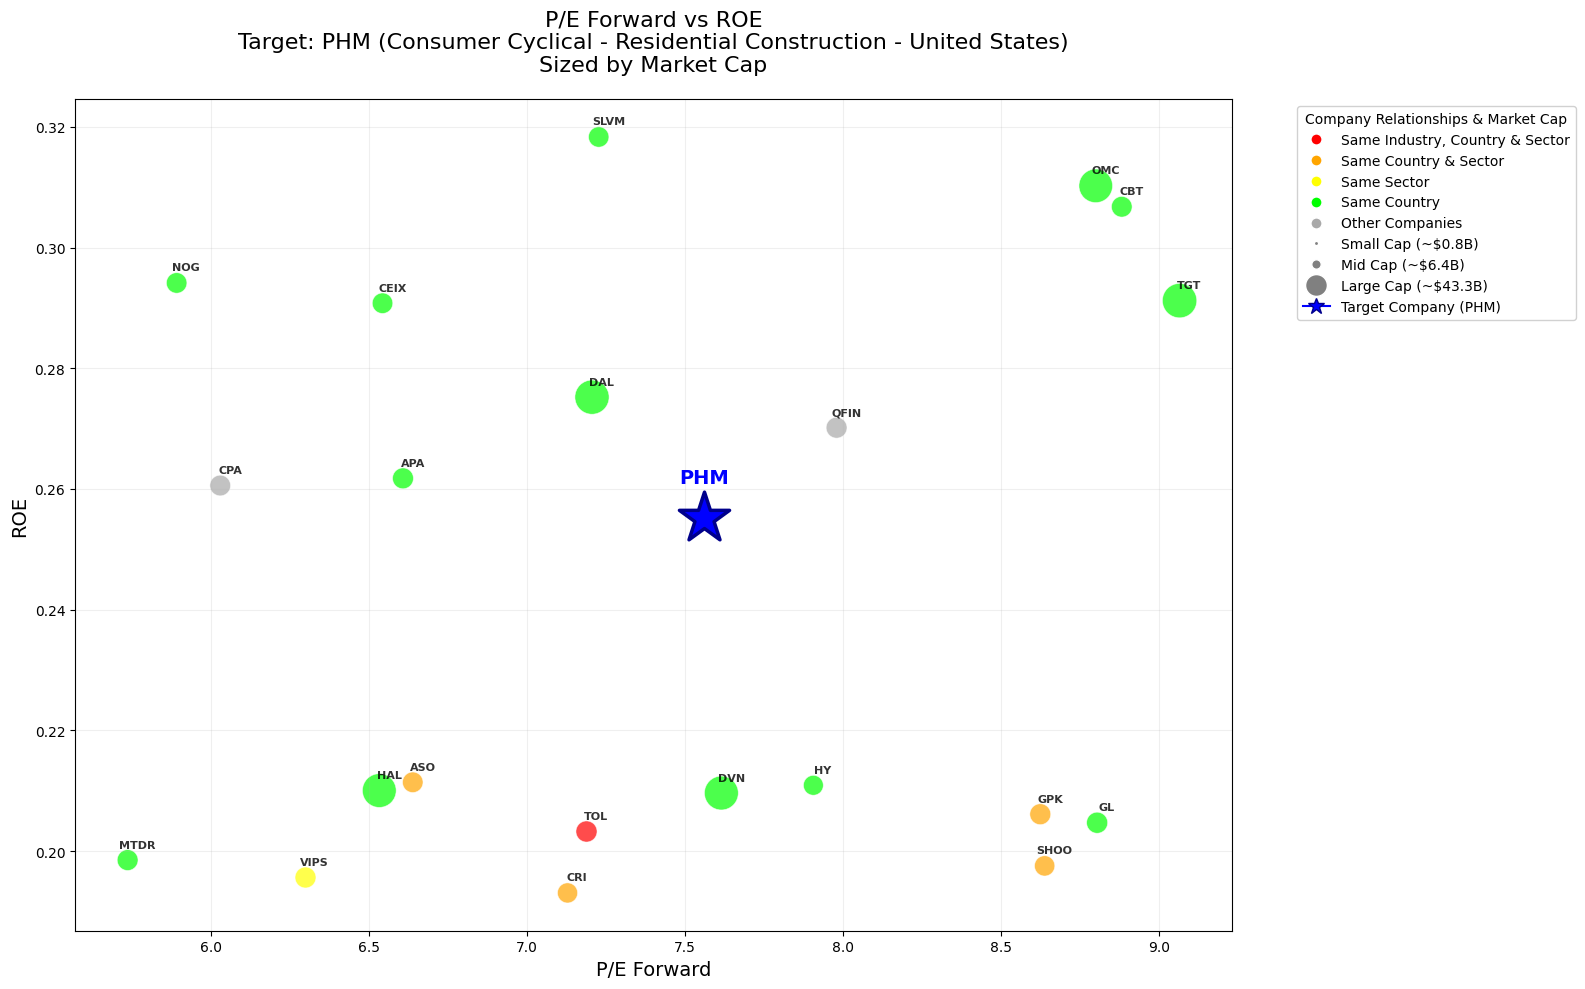

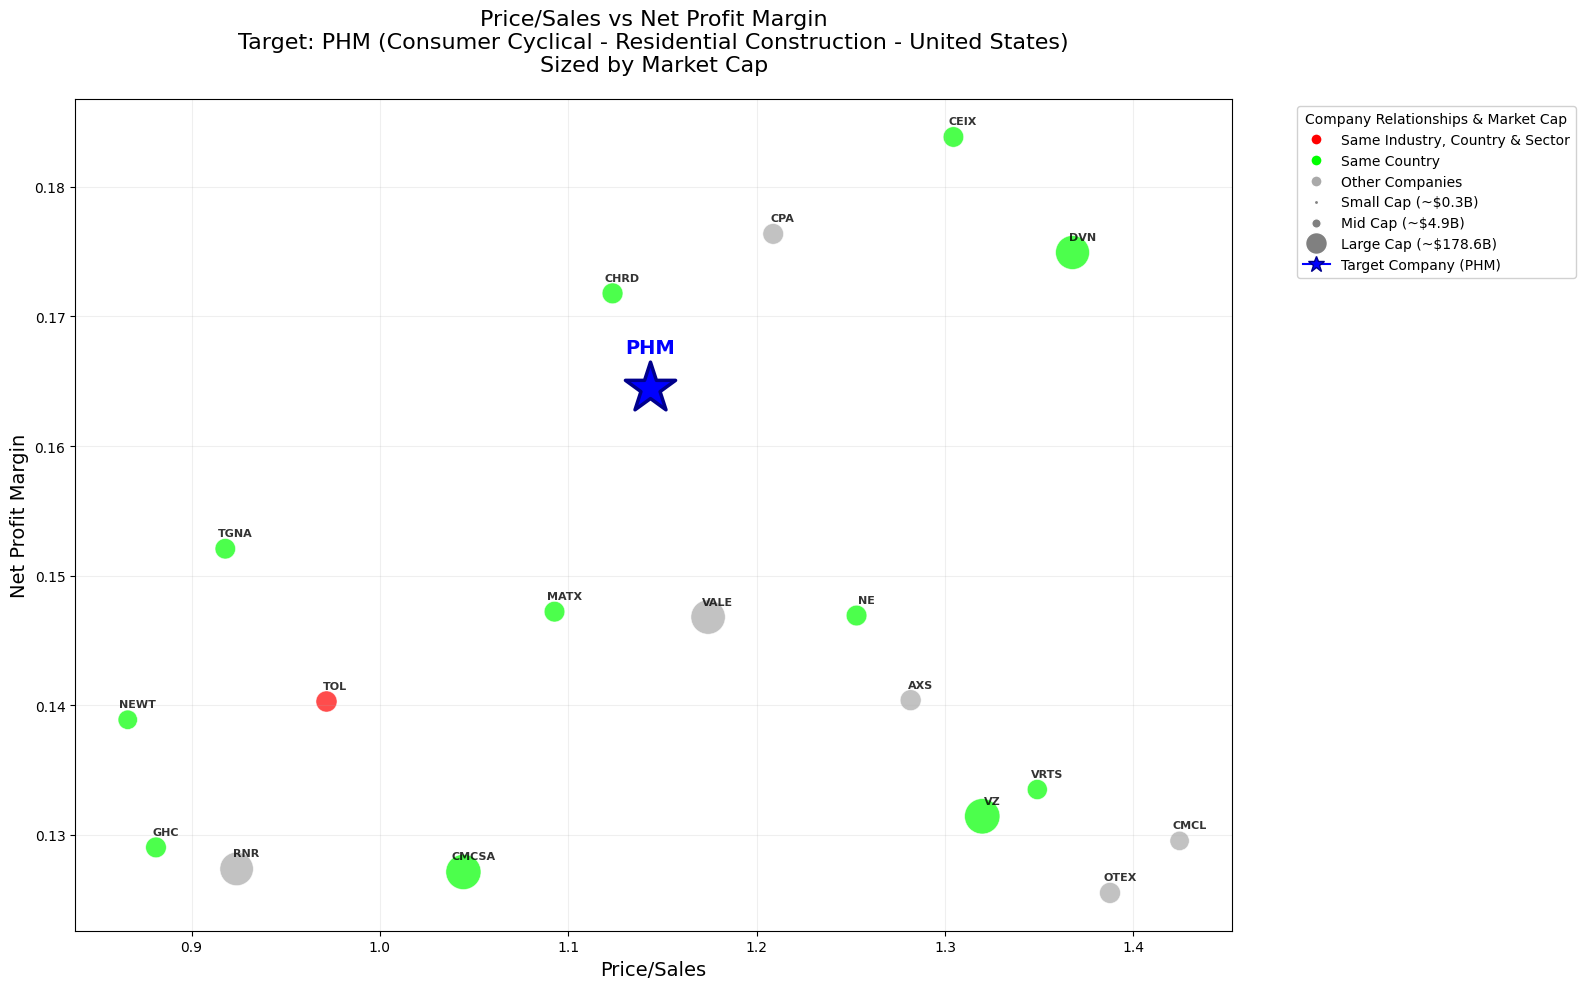

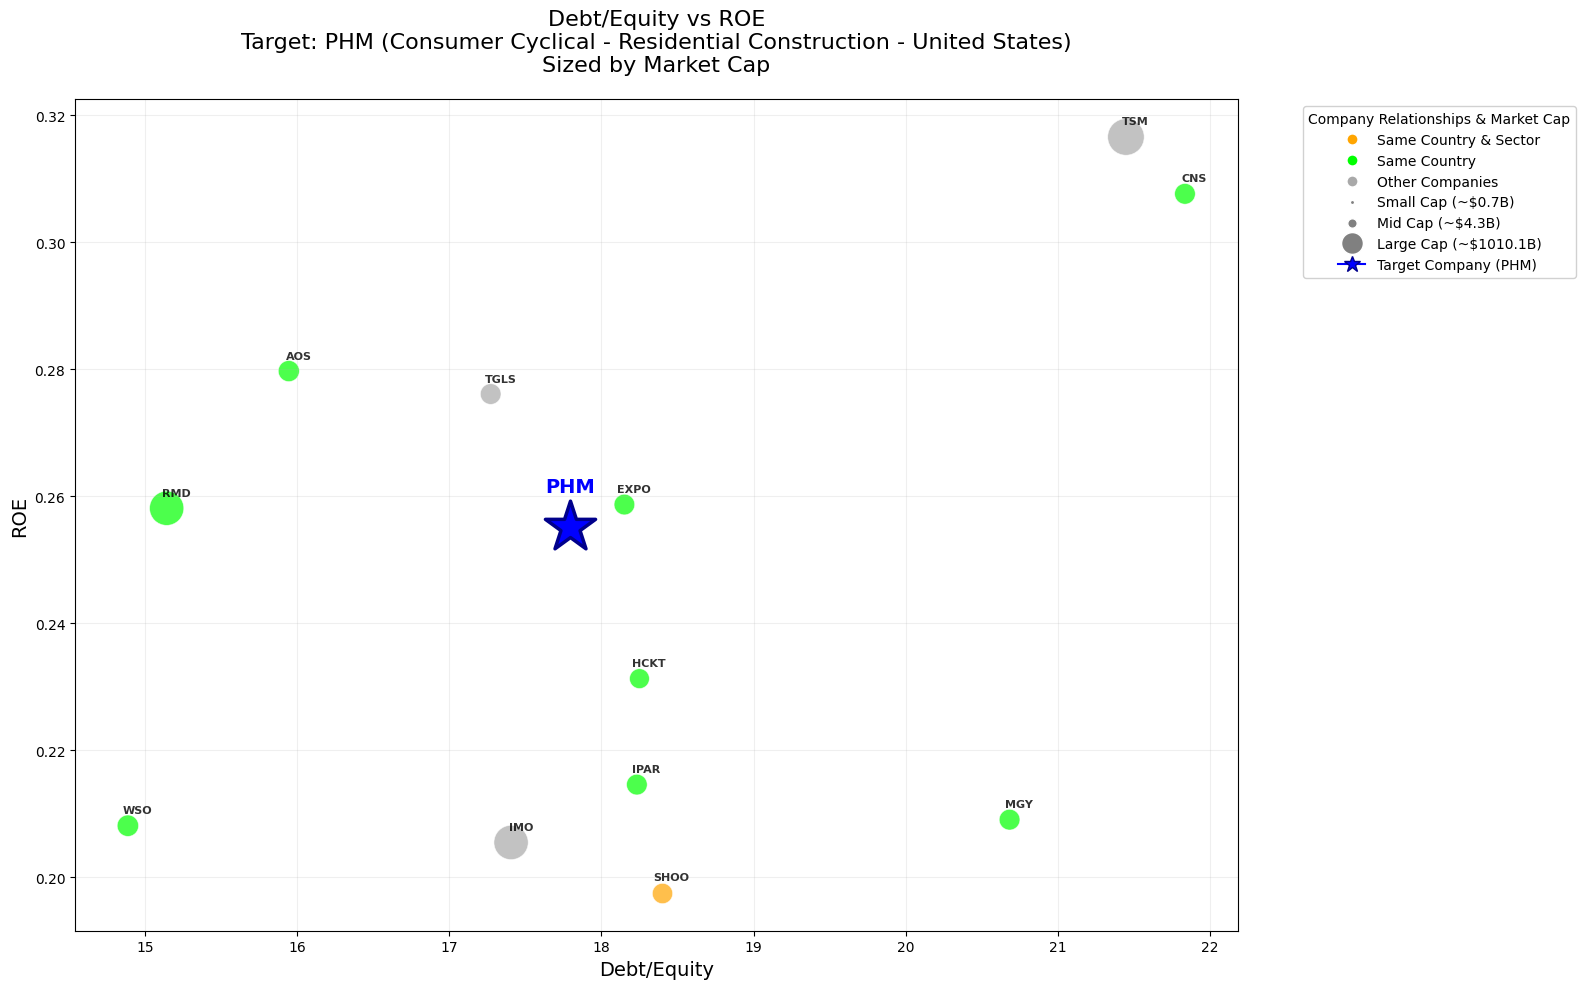

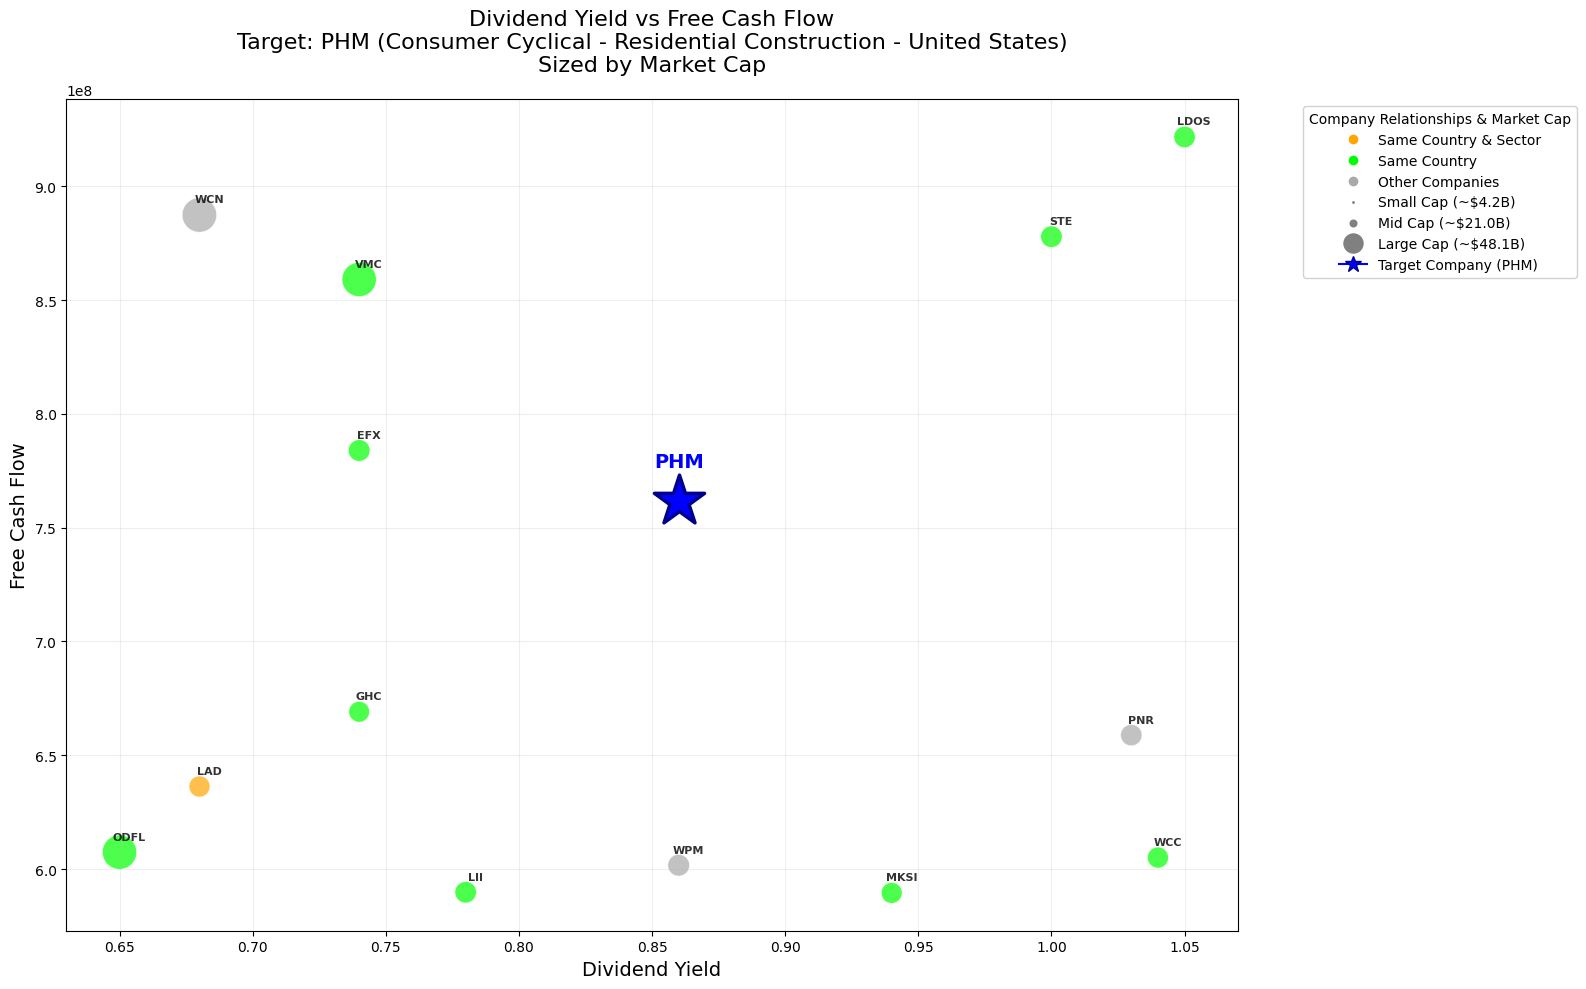

In [11]:


###################################################
# Configuration
##################################################
target_symbol = 'PHM'  # company of interest
metric_pairs = [
    ('P/E Forward', 'ROE'),
    ('Price/Sales', 'Net Profit Margin'),
    ('Debt/Equity', 'ROE'),
    ('Dividend Yield', 'Free Cash Flow')
]

# Get target company details (Pultre group, PHM)
target_data = df_metrics[df_metrics['symbol'] == target_symbol].iloc[0]
target_sector = target_data['sector']
target_country = target_data['country']
target_industry = target_data['industry']

for metric1, metric2 in metric_pairs:
    
    m1_val = target_data[metric1]
    m2_val = target_data[metric2]
    
    
    m1_low, m1_high = m1_val * 0.75, m1_val * 1.25
    m2_low, m2_high = m2_val * 0.75, m2_val * 1.25
    
    # Filter dataframe according to the info above  and exclude the Pultre company
    filtered_df = df_metrics[
        (df_metrics[metric1].between(m1_low, m1_high)) & 
        (df_metrics[metric2].between(m2_low, m2_high)) &
        (df_metrics['symbol'] != target_symbol)  
    ].copy()
    
    ###################################################
    # Marker Size Calculation (market cap)
    ##################################################
    min_size = 30
    mid_size = 150
    max_size = 800
    
    filtered_df['marker_size'] = np.where(
        filtered_df['market_cap'] > filtered_df['market_cap'].quantile(0.75),
        np.log(filtered_df['market_cap']) * 25,
        np.log(filtered_df['market_cap']) * 10
    )
    filtered_df['marker_size'] = filtered_df['marker_size'].clip(min_size, max_size)
    
    plt.figure(figsize=(16, 10))
    
    # Categorize companies based on their relationship to target
    filtered_df['relationship'] = 'Other Companies'
    

    # mask documentation : 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html'


    # Same industry, country and sector (closest peers)
    mask = (filtered_df['industry'] == target_industry) & \
           (filtered_df['country'] == target_country) & \
           (filtered_df['sector'] == target_sector)
    filtered_df.loc[mask, 'relationship'] = 'Same Industry, Country & Sector'
    
    # Same country and sector
    mask = (filtered_df['country'] == target_country) & \
           (filtered_df['sector'] == target_sector) & \
           (filtered_df['relationship'] != 'Same Industry, Country & Sector')
    filtered_df.loc[mask, 'relationship'] = 'Same Country & Sector'
    
    # Same country only
    mask = (filtered_df['country'] == target_country) & \
           (filtered_df['relationship'] == 'Other Companies')
    filtered_df.loc[mask, 'relationship'] = 'Same Country'
    
    # Same sector only
    mask = (filtered_df['sector'] == target_sector) & \
           (filtered_df['relationship'] == 'Other Companies')
    filtered_df.loc[mask, 'relationship'] = 'Same Sector'
    
    # Same industry only (but different country/sector)
    mask = (filtered_df['industry'] == target_industry) & \
           (filtered_df['relationship'] == 'Other Companies')
    filtered_df.loc[mask, 'relationship'] = 'Same Industry'
    
    # Define colors for each relationship category
    relationship_colors = {
        'Same Industry, Country & Sector': '#FF0000',  
        'Same Country & Sector': '#FFA500',           
        'Same Sector': '#FFFF00',                     
        'Same Country': '#00FF00',                    
        'Same Industry': '#00CED1',                   
        'Other Companies': '#A9A9A9'                  
    }
   
    
    # Plot all companies by relationship category
    for relationship, color in relationship_colors.items():
        subset = filtered_df[filtered_df['relationship'] == relationship]
        if len(subset) > 0:
            plt.scatter(
                subset[metric1], subset[metric2],
                color=color, alpha=0.7, label=relationship,
                s=subset['marker_size'],
                edgecolors='white', linewidths=0.5
            )
            
            
            for _, row in subset.iterrows():
                plt.annotate(
                    row['symbol'],
                    (row[metric1], row[metric2]),
                    textcoords="offset points",
                    xytext=(7, 9),
                    ha='center', fontsize=8,
                    alpha=0.8, weight='bold'
                )
    
    ###################################################
    # Highlight target company (Pultre)
    ##################################################
    target_marker_size = max_size * 1.8
    plt.scatter(
        [m1_val], [m2_val],
        color='blue', marker='*',
        s=target_marker_size,
        edgecolors='darkblue', linewidths=2.5,
        label=f'Target Company ({target_symbol})',
        zorder=10  
    )
    
    plt.annotate(
        f"{target_symbol}",
        (m1_val, m2_val),
        textcoords="offset points",
        xytext=(0, 25),
        ha='center', fontsize=14,
        weight='bold', color='blue'
    )
    

    
    
    legend_elements = []
    
    # Add relationship categories to legend (colors)
    for relationship, color in relationship_colors.items():
        if len(filtered_df[filtered_df['relationship'] == relationship]) > 0:
            legend_elements.append(
                plt.Line2D([0], [0], marker='o', color='w', label=relationship,
                          markerfacecolor=color, markersize=8)
            )
    
    
    if len(filtered_df) > 0:
        cap_tiers = [
            ('Small Cap', min_size, filtered_df["market_cap"].min()),
            ('Mid Cap', mid_size, filtered_df["market_cap"].median()),
            ('Large Cap', max_size, filtered_df["market_cap"].max())
        ]
        
        for label, size, value in cap_tiers:
            legend_elements.append(
                plt.Line2D([0], [0], marker='o', color='w', 
                          label=f'{label} (~${value/1e9:.1f}B)',
                          markerfacecolor='gray', markersize=np.sqrt(size)/1.8)
            )
    
    # info of my company
    legend_elements.append(
        plt.Line2D([0], [0], marker='*', color='blue', 
                  label=f'Target Company ({target_symbol})',
                  markersize=12, markeredgecolor='darkblue')
    )
    
    # Add the legend
    plt.legend(
        handles=legend_elements,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title="Company Relationships & Market Cap",
        framealpha=0.9
    )
    
    ###################################################
    # Final formatting
    ##################################################
    plt.xlabel(metric1, fontsize=14)
    plt.ylabel(metric2, fontsize=14)
    plt.title(f'{metric1} vs {metric2}\nTarget: {target_symbol} ({target_sector} - {target_industry} - {target_country})\nSized by Market Cap', 
              fontsize=16, pad=20)
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()